In [ ]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from textwrap import wrap
import seaborn as sns
import matplotlib as mpl
import locale
from locale import atof
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import tree
import graphviz

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -- set the filename
fcity0 = "/content/drive/MyDrive/mlpp21/data/group4/mlpp_data/TotlAccbycities2012-19.csv"
fcity1 = "/content/drive/MyDrive/mlpp21/data/group4/mlpp_data/AccTotalbycities2019.csv"
fcity2 = "/content/drive/MyDrive/mlpp21/data/group4/mlpp_data/AccbyRoadtypebycities2019.csv"
fcity3 = "/content/drive/MyDrive/mlpp21/data/group4/mlpp_data/AccbyVehicleImpactedbycities2019.csv"
fcity4 = "/content/drive/MyDrive/mlpp21/data/group4/mlpp_data/Accbytrafficviolationbycities2019.csv"
fcity5 = "/content/drive/MyDrive/mlpp21/data/group4/mlpp_data/Accbyweathercondbycities2019.csv"
fcity6 = "/content/drive/MyDrive/mlpp21/data/group4/mlpp_data/50 Indian Cities Database.csv"


# -- read the csv into a DataFrame
TA_City_13_19 = pd.read_csv(fcity0) # Total Accidents by Cities from 2013-2019
TA_city = pd.read_csv(fcity1) # Total Accidents by Cities for 2019
A_Rtyp_city = pd.read_csv(fcity2) # Accidents by Road type for Cities for 2019
A_Veh_city = pd.read_csv(fcity3) # Accidents by Vehicle impacted for Cities for 2019
A_TrfVio_city = pd.read_csv(fcity4) # Accidents due to Traffic Violations for Cities for 2019
A_Wethr_city = pd.read_csv(fcity5) # Accidnets due to Weather Conditions in Cities for 2019
LongLatCity = pd.read_csv(fcity6) # The Latitude and Laongitude of the 50 Indian cities having population more than 1 Million


In [ ]:
subcols = ['TAcc2013','TAcc2014','TAcc2015','TAcc2016','TAcc2017','TAcc2018']
TA_City_13_19_sel = TA_City_13_19[subcols]
TA_City_13_19_sel

,TAcc2013,TAcc2014,TAcc2015,TAcc2016,TAcc2017,TAcc2018
0,1008,995,1143,1062,1032,1273
1,1888,1642,1837,1783,1563,1585
2,1125,1101,1019,1100,1163,1380
3,135,165,150,152,119,123
4,433,443,446,416,425,447
5,565,560,654,666,592,567
6,5215,5004,4834,5323,2297,4611
7,3294,3459,3621,3571,3393,3508
8,410,369,416,428,342,316
9,9705,9610,7328,7486,7257,7580


In [ ]:
# Extracting the data for the number of accidents per state number per year from the DataFrame using the .values attribute so that we can have a rectangular 2D numpy array that has N rows   ×  N cols  where N rows  is the number of states and N cols  is number of years
# Creating a subdataframe having number of accidents by state and the numnber of years
# -- extract time series
vl_TA_c13_19=TA_City_13_19_sel.values.copy()
vl_TA_c13_19

array([[ 1008,   995,  1143,  1062,  1032,  1273],
       [ 1888,  1642,  1837,  1783,  1563,  1585],
       [ 1125,  1101,  1019,  1100,  1163,  1380],
       [  135,   165,   150,   152,   119,   123],
       [  433,   443,   446,   416,   425,   447],
       [  565,   560,   654,   666,   592,   567],
       [ 5215,  5004,  4834,  5323,  2297,  4611],
       [ 3294,  3459,  3621,  3571,  3393,  3508],
       [  410,   369,   416,   428,   342,   316],
       [ 9705,  9610,  7328,  7486,  7257,  7580],
       [ 1300,  1594,  1513,  1354,  1299,  1136],
       [ 7566,  8623,  8085,  7375,  6673,  6515],
       [  484,   106,   114,   217,   366,   365],
       [  713,   719,   669,   624,   712,   702],
       [  874,   897,   826,   887,   930,  1054],
       [ 1934,  1959,  2140,  1993,  2156,  2104],
       [ 2591,  2908,  2761,  2945,  2834,  2846],
       [ 5516,  5784,  5873,  5143,  4513,  3434],
       [ 2939,  3124,  3374,  3256,  3303,  3419],
       [ 1794,  1920,  1894,  3

In [ ]:
# -- create years array
years = np.arange(2013, 2019)
years

array([2013, 2014, 2015, 2016, 2017, 2018])

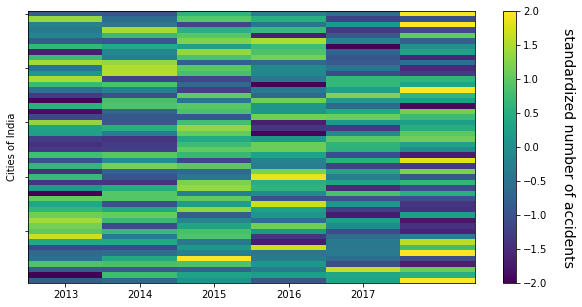

In [ ]:
# -- standardize values
vl_TA_c13_19_st = (vl_TA_c13_19 - vl_TA_c13_19.mean(axis=1, keepdims=True)) / vl_TA_c13_19.std(axis=1, keepdims=True)

# -- initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# -- make a heat map
#    Note: using interpolation="nearest" so the image is not interpolated
im = ax.imshow(vl_TA_c13_19_st, cmap="viridis", clim=[-2, 2], aspect="auto", interpolation="nearest")

# -- set the x-axis ticks and labels
xt = np.arange(0, 5)
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])

# -- set the y-axis label
ax.set_yticklabels("")
ax.set_ylabel("Cities of India")

# -- create a colorbar
fig.colorbar(im, ax=ax)

# -- label the colorbar
fig.text(0.875, 0.5, "standardized number of accidents", va="center", 
         ha="center", rotation=-90, fontsize=14)

# -- show the figure
fig.show()

In [ ]:
# Clustering Accidents
# Using scikit-learn's `KMeans` model to cluster the standardized Accidents data into 4 clusters 

# -- initialize K-Means
kmta4 = KMeans(n_clusters=4, random_state=2)

# -- cluster the data
kmta4.fit(vl_TA_c13_19_st)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

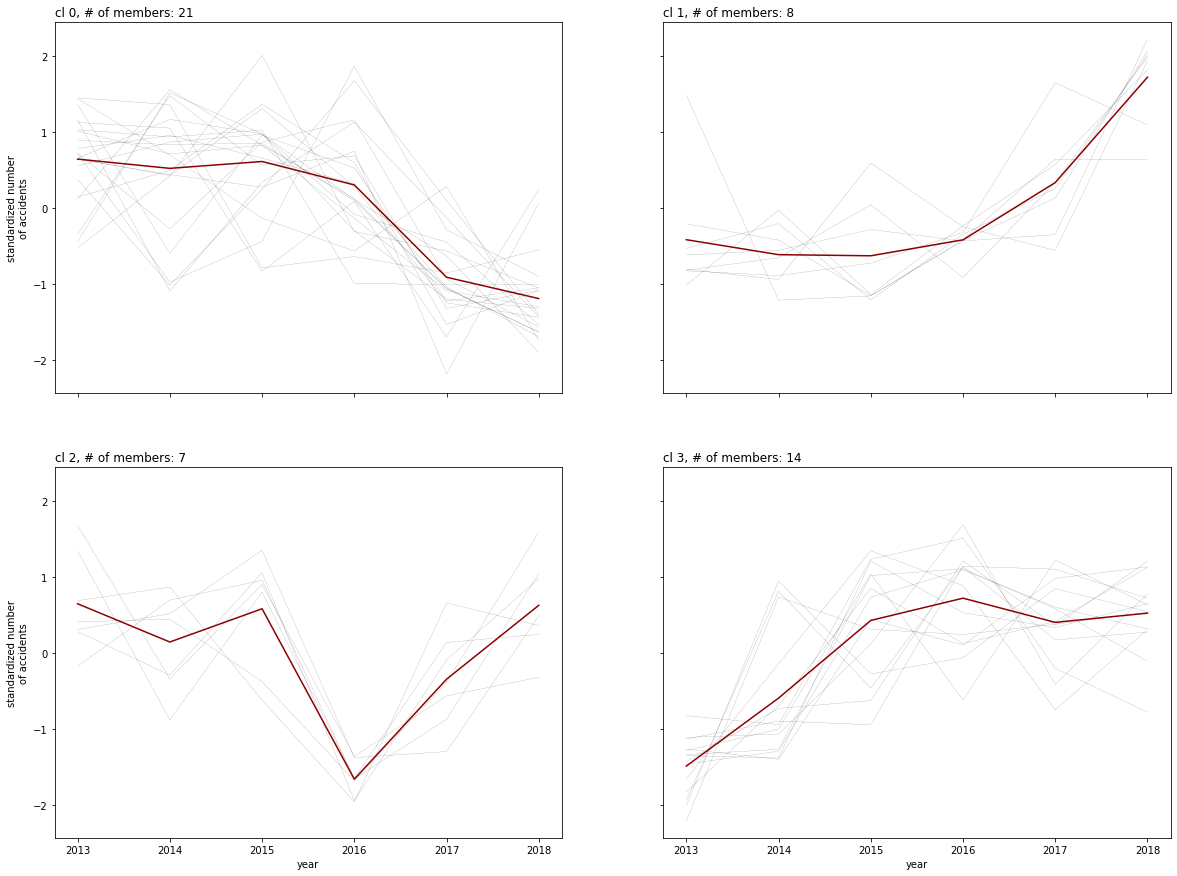

In [ ]:
#Creating a 8 panel plot for each cluster centre for accidents

# -- initialize plot
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[20, 15])

# -- loop through clusters
for ii in range(kmta4.n_clusters):

  # -- set ax row and col index
  irow = ii // 2
  icol = ii % 2

  # -- define index for this color
  indx = kmta4.labels_ == ii

  # -- get the member time series
  mems = vl_TA_c13_19_st[indx]

  # -- plot members
  ax[irow, icol].plot(years, mems.T, color="k", lw=0.1)

  # -- plot cluster center
  ax[irow, icol].plot(years, kmta4.cluster_centers_[ii], c="darkred")

  # -- set title to be number of members
  ax[irow, icol].set_title("cl {0}, # of members: {1}".format(ii, indx.sum()), loc="left")

# -- set the axis labels
ax[1, 0].set_xlabel("year")
ax[1, 1].set_xlabel("year")
ax[0, 0].set_ylabel("standardized number\nof accidents")
ax[1, 0].set_ylabel("standardized number\nof accidents")

# -- show the figure
fig.show()

In [ ]:
# -- extracting latitude and longitude
LongLatCity.dropna(axis=1)
lon_city = LongLatCity['Long'].values
lat_city = LongLatCity['Lat'].values

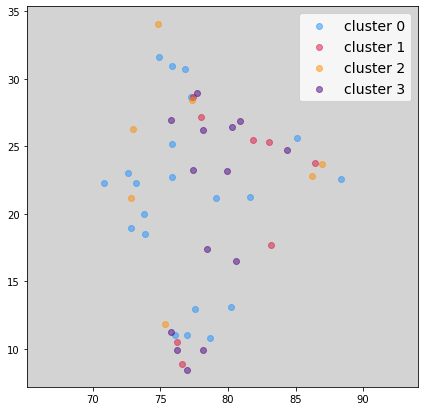

In [ ]:
# -- create a colors list
clrs = ["dodgerblue", "crimson", "darkorange", "indigo"]

# -- initialize the plot
fig, ax = plt.subplots(figsize=[7, 7])
ax.axis("equal")
ax.set_facecolor("lightgray")

# -- loop through cluster centers
for ii in range(kmta4.n_clusters):

  # -- set T/F array for cluster label
  indx1 = kmta4.labels_ == ii

  # -- add scatter plot
  ax.scatter(lon_city[indx1], lat_city[indx1], c=clrs[ii], alpha=0.5, label="cluster {0}".format(ii))
  

# -- add legend
ax.legend(fontsize=14)
fig.show()

In [ ]:
# Details of Clustering Feature
print("clustering centers", kmta4.cluster_centers_[ii])
print("Number of clusters", kmta4.n_clusters)
print ( "Number of years", years)
print ("Clustering members", mems.T)

clustering centers [-1.48562297 -0.59207503  0.42879342  0.72115842  0.40315567  0.52459049]
Number of clusters 4
Number of years [2013 2014 2015 2016 2017 2018]
Clustering members [[-0.82378402 -1.65358393 -1.28148408 -1.93317748 -1.82818273 -1.12981787
  -1.26248053 -1.46013212 -1.33397388 -1.42580559 -1.34829437 -2.00249021
  -1.10863349 -2.2068813 ]
 [-0.93926777 -0.14060048 -0.99963274  0.81282967 -0.68877631 -0.89334437
  -1.39761224 -1.29027335 -1.26633577 -0.72717227 -1.37822875  0.94728579
  -1.06543998  0.73751817]
 [ 1.23182658  1.34487418  1.04097094 -0.46055535  0.85096209 -0.94214049
   0.4416805   0.73496583  1.01832936 -0.62443207  1.21109512 -0.27579206
   0.11929637  0.31202692]
 [ 1.50898756  0.88639434 -0.61631492  1.13334154  0.12420556  1.14107852
   0.10385122  1.09428246  1.10851351  1.21119274  0.53008798 -0.0599548
   1.68660383  0.24394832]
 [-0.20017182 -0.74579386  1.22135579  0.17180592  0.41367638  1.10166627
   0.98220735  0.60430524  0.5824393   0.36187

In [ ]:
# Cluster Labels are stored in KMeans labels so extracting those and converting them in string
kmta4.labels_
clabel = kmta4.labels_.astype(str)
clabel

array(['1', '0', '1', '0', '2', '3', '0', '3', '0', '0', '0', '0', '1',
       '2', '1', '3', '3', '0', '3', '3', '2', '2', '2', '3', '3', '3',
       '0', '1', '0', '3', '0', '3', '0', '3', '0', '0', '0', '0', '0',
       '0', '0', '2', '2', '3', '1', '0', '0', '1', '3', '1'],
      dtype='<U11')

In [ ]:
# -- one hot encodeing the cluster labels
clusters = pd.get_dummies(clabel)
Trend_TAcc = pd.DataFrame(data = clusters.values.copy(),columns=['trend_0','trend_1','trend_2','trend_3'])
Trend_TAcc

,trend_0,trend_1,trend_2,trend_3
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,0,0,1
6,1,0,0,0
7,0,0,0,1
8,1,0,0,0
9,1,0,0,0


**Random Forest Regressor Model** **for change in Road Accident every next year compared to previous year in combination with the trend cluster classfifications to predict Road Accidents in 50 Indian Cities.**

In [ ]:
# Preparing Features 
TA_City_13_19_sel["Change in 14 ovr 13"] = TA_City_13_19_sel['TAcc2014'] - TA_City_13_19_sel['TAcc2013']
TA_City_13_19_sel["Change in 15 ovr 14"] = TA_City_13_19_sel['TAcc2015'] - TA_City_13_19_sel['TAcc2014']
TA_City_13_19_sel["Change in 16 ovr 15"] = TA_City_13_19_sel['TAcc2016'] - TA_City_13_19_sel['TAcc2015']
TA_City_13_19_sel["Change in 17 ovr 16"] = TA_City_13_19_sel['TAcc2017'] - TA_City_13_19_sel['TAcc2016']
TA_City_13_19_sel["Change in 18 ovr 17"] = TA_City_13_19_sel['TAcc2018'] - TA_City_13_19_sel['TAcc2017']
TA_City_13_19_sel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TAcc2013,TAcc2014,TAcc2015,TAcc2016,TAcc2017,TAcc2018,Change in 14 ovr 13,Change in 15 ovr 14,Change in 16 ovr 15,Change in 17 ovr 16,Change in 18 ovr 17
0,1008,995,1143,1062,1032,1273,-13,148,-81,-30,241
1,1888,1642,1837,1783,1563,1585,-246,195,-54,-220,22
2,1125,1101,1019,1100,1163,1380,-24,-82,81,63,217
3,135,165,150,152,119,123,30,-15,2,-33,4
4,433,443,446,416,425,447,10,3,-30,9,22
5,565,560,654,666,592,567,-5,94,12,-74,-25
6,5215,5004,4834,5323,2297,4611,-211,-170,489,-3026,2314
7,3294,3459,3621,3571,3393,3508,165,162,-50,-178,115
8,410,369,416,428,342,316,-41,47,12,-86,-26
9,9705,9610,7328,7486,7257,7580,-95,-2282,158,-229,323


In [ ]:
# Combining the Features of trending clusters and the change in the preceding year compared to the previous year
feat0 = TA_City_13_19_sel[['Change in 14 ovr 13','Change in 15 ovr 14','Change in 16 ovr 15', 'Change in 17 ovr 16','Change in 18 ovr 17']]
feat0 = pd.concat((feat0, Trend_TAcc),axis=1)
feat0

,Change in 14 ovr 13,Change in 15 ovr 14,Change in 16 ovr 15,Change in 17 ovr 16,Change in 18 ovr 17,trend_0,trend_1,trend_2,trend_3
0,-13,148,-81,-30,241,0,1,0,0
1,-246,195,-54,-220,22,1,0,0,0
2,-24,-82,81,63,217,0,1,0,0
3,30,-15,2,-33,4,1,0,0,0
4,10,3,-30,9,22,0,0,1,0
5,-5,94,12,-74,-25,0,0,0,1
6,-211,-170,489,-3026,2314,1,0,0,0
7,165,162,-50,-178,115,0,0,0,1
8,-41,47,12,-86,-26,1,0,0,0
9,-95,-2282,158,-229,323,1,0,0,0


In [ ]:
# Target
#TA_City_13_19["Change in 2019 over 2018"] = TA_City_13_19['TAcc2019'] - TA_City_13_19['TAcc2018']
#targ0 = TA_City_13_19["Change in 2019 over 2018"]
targ0 = TA_City_13_19['TAcc2019']

In [ ]:
# -- create a random training and testing set
feat_tr0, feat_te0, targ_tr0, targ_te0 = train_test_split(feat0, targ0, test_size=0.20, random_state= 302)

In [ ]:
# Initialize the decision Tree
rf0 = RandomForestRegressor(random_state = 49, n_estimators = 21)

#  Fitting the Decision Tree Regressor on the TRAINING data
rf0.fit(feat_tr0, targ_tr0.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=21, n_jobs=None, oob_score=False,
                      random_state=49, verbose=0, warm_start=False)

In [ ]:
# Assessing thePredictions using the Training Data
pred_tr0 = rf0.predict(feat_tr0)
print("Training Predictions:", np.round(pred_tr0,0), "\n Training Target", targ_tr0.values)

Training Predictions: [1527. 5342. 2841.  695. 1966. 3037.  683.  745.  943. 2019. 2620.  789.
 2144. 1021. 2529. 2628. 1020. 1607. 1777. 4773.  890.  586.  521.  792.
 1773.  811. 3592. 1410. 1516. 2476. 1530. 1633.  562. 1801. 1164.  763.
 2003.  921. 1097.  593.] 
 Training Target [ 524 6871 3383  657 1495 4684  191  791 1085 1940 2872  517 2562  784
 2900 2500  553 1995 2210 5610  945  575  305  171 2290  689 4271 1062
 1375 3397 2146  956  310 1597 1117  679 1685  446 1007  553]


In [ ]:
# -- Assessing the predictions using the TESTING data
pred_te0 = rf0.predict(feat_te0)
print("Testing Predictions:", np.round(pred_te0,0), "\n Testing Target:    ", targ_te0.values)

Testing Predictions: [2422. 1333.  947. 1100. 1427.  782. 1559. 1470.  890. 1488.] 
 Testing Target:     [3287 1706 1413  133 1507  610 2109  890  560  866]


In [ ]:
#acc_te0 = accuracy_score(targ_te0, pred_te0)
#acc_te0 = abs((targ_te0.sum() - pred_te0.sum())) / abs(targ_te0.sum())
#print("testing accuracy = {0:.3f}".format(acc_te0))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(targ_te0, pred_te0))
print('Mean Squared Error:', metrics.mean_squared_error(targ_te0, pred_te0))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(targ_te0, pred_te0)))
# R-squared scores
r2 = r2_score(targ_te0.values.ravel(), pred_te0)
print("R square", r2)
print(rf0.score(feat_tr0, targ_tr0))  
print(rf0.score(feat_te0, targ_te0))

Mean Absolute Error: 500.55238095238093
Mean Squared Error: 321045.3283446712
Root Mean Squared Error: 566.6086200762138
R square 0.5755890942211458
0.8698047831294136
0.5755890942211458


**Model Preperation for only year 2019 using all the features** which corelates with the road accidents. For instance: 

**Traffic Violations **(Overspeeding, Drunken Drivers, Driving on Wrong side, Jumping Red Lights Use of cellphones and Other violations), **Road Types **(Straight or curved road, Bridge or pot holes etc), **Impacted vehicle/Object in Road Accidents** (Pedestrian, 2 wheelers, bus, car, truck etc.) and **Weather Conditions** (Sunny, Foggy and Misty, Rain and Hail etc)


In [ ]:
# Total Accidents by Cities for 2019
TA_city

,Cities,TAcc2019
0,Agra,1085
1,Ahmedabad,1375
2,Allahabad,1413
3,Amritsar,133
4,Asansol Durgapur,446
5,Aurangabad,560
6,Bengaluru,4684
7,Bhopal,3287
8,Chandigarh,305
9,Chennai,6871


In [ ]:
# Accidents by Road type for Cities for 2019
A_Rtyp_city 

,Cities,Straight RoadAcc,Curved Road Acc,Bridge Acc,CulvertAcc,Pot HolesAcc,Steep GradeAcc
0,Agra,579,51,40,66,59,44
1,Ahmedabad,1235,49,72,0,2,0
2,Allahabad,190,171,165,157,239,138
3,Amritsar,84,8,15,0,0,0
4,AsansolDurgapur,403,24,11,4,1,0
5,Aurangabad,515,34,6,0,1,4
6,Bengaluru,4122,327,214,0,11,0
7,Bhopal,1399,481,266,0,0,0
8,Chandigarh,305,0,0,0,0,0
9,Coimbatore,923,94,45,0,0,0


In [ ]:
# Accidents by Vehicle impacted for Cities for 2019
A_Veh_city

,Cities,Pedestrian_Acc,Bicycles_Acc,Two Wheelers_Acc,AutoRickshaws_Acc,S.Cars Taxis Vans LMV Acc,Trucks/Lorries,Buses,Other Non-motorized vehicle,Others
0,Agra,26,39,277,74,116,99,190,188,76
1,Ahmedabad,418,29,591,136,113,18,15,0,55
2,Allahabad,110,92,241,210,198,126,141,201,94
3,Amritsar,18,9,74,1,14,2,0,2,13
4,AsansolDurgapur,208,21,102,1,39,34,11,3,27
5,Aurangabad,158,8,270,25,73,6,10,2,8
6,Bengaluru,1352,47,2197,184,581,81,66,0,176
7,Bhopal,138,2,1187,141,1163,221,218,0,217
8,Chandigarh,88,28,124,18,39,1,2,5,0
9,Coimbatore,111,11,433,31,234,123,119,0,0


In [ ]:
# Accidents due to Traffic Violations for Cities for 2019
A_TrfVio_city = A_TrfVio_city.rename({'Cities with Million plus population': 'Cities'},axis=1)
A_TrfVio_city

,Cities,Over Speeding No. of Accidents,Drunk Number of Accidents,wrong side Number of Accidents,Jumping Red Light Total Accidents,cellphone accidents,other accidents
0,Agra,477,169,203,102,134,0
1,Ahmedabad,1358,3,13,0,1,0
2,Allahabad,297,230,267,233,246,140
3,Amritsar,93,1,1,0,0,38
4,AsansolDurgapur,217,0,5,0,0,224
5,Aurangabad,534,0,0,0,0,26
6,Bengaluru,4143,32,77,51,10,371
7,Bhopal,1861,0,109,27,0,1290
8,Chandigarh,282,8,3,12,0,0
9,Coimbatore,888,4,55,13,0,102


In [ ]:
# Accidnets due to Weather Conditions in Cities for 2019
A_Wethr_city

,Cities,SunnyClear_TotalAccc,Rainy_TotalAcc,FoggyMisty_RoadAcc,HailSleet_TotalAcc,Others_TotalAcc
0,Agra,439,173,350,62,61
1,Ahmedabad,1249,79,47,0,0
2,Allahabad,377,241,339,233,223
3,Amritsar,86,0,7,0,40
4,AsansolDurgapur,202,5,75,0,164
5,Aurangabad,551,3,6,0,0
6,Bengaluru,4521,90,73,0,0
7,Bhopal,2486,267,47,0,487
8,Chandigarh,299,4,2,0,0
9,Coimbatore,959,103,0,0,0


In [ ]:
# -- pull out the target variable
target = TA_city['TAcc2019']
target

0     1085
1     1375
2     1413
3      133
4      446
5      560
6     4684
7     3287
8      305
9     6871
10    1062
11    5610
12     171
13     689
14     890
15    2109
16    2900
17    3383
18    3397
19    4271
20     191
21    1117
22     657
23    1507
24    1597
25    2290
26    2500
27    1940
28     784
29    1685
30     553
31     866
32    2562
33     956
34    2872
35    1007
36     553
37     524
38     791
39    2146
40     575
41     310
42     945
43    1995
44    2210
45     517
46     679
47     610
48    1495
49    1706
Name: TAcc2019, dtype: int64

In [ ]:
# -- create features matrix
feat = A_TrfVio_city.merge(A_Veh_city, how='outer')
feat = feat.merge(A_Rtyp_city, how='outer')
feat = feat.merge(A_Wethr_city, how = 'outer')
feat = feat.drop("Cities", axis=1) 
feat.shape

(50, 26)

**Trying** **Decision Tree Regressor**

In [ ]:
# -- create a random training and testing set
feat_tr, feat_te, target_tr, target_te = train_test_split(feat, target, test_size=0.20, random_state=302)

In [ ]:
# Initialize the decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=17, max_depth=50)

In [ ]:
# -- fit a decision tree regressor on the TRAINING data
dtr.fit(feat_tr, target_tr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=17, splitter='best')

In [ ]:
# -- Assessing the Prediction for the  TRAINING data
pred_tr = dtr.predict(feat_tr)
print("Training Predictions: ", np.round(pred_tr,0), "\n Training Target", target_tr.values)

Training Predictions:  [ 524. 6871. 3383.  657. 1495. 4684.  191.  791. 1085. 1940. 2872.  517.
 2562.  784. 2900. 2500.  553. 1995. 2210. 5610.  945.  575.  305.  171.
 2290.  689. 4271. 1062. 1375. 3397. 2146.  956.  310. 1597. 1117.  679.
 1685.  446. 1007.  553.] 
 Training Target [ 524 6871 3383  657 1495 4684  191  791 1085 1940 2872  517 2562  784
 2900 2500  553 1995 2210 5610  945  575  305  171 2290  689 4271 1062
 1375 3397 2146  956  310 1597 1117  679 1685  446 1007  553]


In [ ]:
# -- Assessing the Prediction for the TESTING data
pred_te = dtr.predict(feat_te)
print("Testing Predictions:", np.round(pred_te,0), "\n Testing Target:    ", target_te.values)

Testing Predictions: [3383. 1597. 1085.  171. 1685. 1085. 6871.  784.  553.  784.] 
 Testing Target:     [3287 1706 1413  133 1507  610 2109  890  560  866]


In [ ]:
print('Mean Squared Error(MSE):', np.round(mean_squared_error(target_te, pred_te)),2)
print('Mean Absolute Error (MAE):', np.round(mean_absolute_error(target_te, pred_te)),2)
print("Root Mean Squared Error:", np.round(np.sqrt(mean_squared_error(target_te, pred_te))),2)
print ("RSquare for Training:   " , r2_score(target_tr, pred_tr))
print ("RSquare for Testing:   " , r2_score(target_te, pred_te))

Mean Squared Error(MSE): 2308209.0 2
Mean Absolute Error (MAE): 618.0 2
Root Mean Squared Error: 1519.0 2
RSquare for Training:    1.0
RSquare for Testing:    -2.0513726835542405


In [ ]:
# print("training accuracy = {0:.3f}".format(acc_tr))
#acc_te = accuracy_score(target_te, pred_te)
#acc_te = abs((target_te.sum() - pred_te.sum())) / target_te.sum()
#print("testing accuracy = {0:.3f}".format(acc_te))

In [ ]:
# # -- Visualize the tree
# dtr_data = tree.export_graphviz(dtr, out_file=None, rounded=False, special_characters=True, 
#             max_depth = 3, feature_names = feat.columns, filled = True)
# graph = graphviz.Source(dtr_data)
# graph

**Trying Random Forest Regressor**

In [ ]:
# Initializing Random Forest Classifier
rf = RandomForestRegressor(random_state= 17, n_estimators=21, max_depth=50)

# -- fitting a randome forest classifier on the TRAINING data
rf.fit(feat_tr, target_tr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=21, n_jobs=None, oob_score=False,
                      random_state=17, verbose=0, warm_start=False)

In [ ]:
# -- Assessing the Prediction for the  TRAINING data
pred_tr = rf.predict(feat_tr)
print("Training Predictions: ", np.round(pred_tr,0), "\n Training Target\n", target_tr.values)

# -- Assessing the Prediction for the TESTING data
pred_te = rf.predict(feat_te)
print("\n\nTesting Predictions:", np.round(pred_te,0), "\n Testing Target:    ", target_te.values)

Training Predictions:  [ 696. 3756. 3465.  690. 1863. 4512.  333.  791. 1029. 1852. 2904.  586.
 2463.  747. 3205. 2678.  580. 2286. 2133. 4796. 1162.  568.  393.  288.
 2503.  648. 4288. 1690. 1825. 3281. 2323. 1246.  364. 1466. 1370.  716.
 1742.  440.  910.  519.] 
 Training Target
 [ 524 6871 3383  657 1495 4684  191  791 1085 1940 2872  517 2562  784
 2900 2500  553 1995 2210 5610  945  575  305  171 2290  689 4271 1062
 1375 3397 2146  956  310 1597 1117  679 1685  446 1007  553]


Testing Predictions: [3191. 2230. 1316.  283. 1321.  992. 3114.  705.  605.  985.] 
 Testing Target:     [3287 1706 1413  133 1507  610 2109  890  560  866]


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(target_te, pred_te))
print('Mean Squared Error:', metrics.mean_squared_error(target_te, pred_te))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_te, pred_te)))
print ("RSquare for Training:   " ,(r2_score(target_tr, pred_tr)))
print ("RSquare for Testing:   " , (r2_score(target_te, pred_te)))

Mean Absolute Error: 278.9714285714286
Mean Squared Error: 155748.5873015873
Root Mean Squared Error: 394.64995540553065
RSquare for Training:    0.8730939331200795
RSquare for Testing:    0.7941057128871292


Trying the model with fewer selected features.

In [ ]:
cols = ['Cities','Straight RoadAcc','Curved Road Acc']
A_Rtyp_selc = A_Rtyp_city[cols]
A_Rtyp_selc

,Cities,Straight RoadAcc,Curved Road Acc
0,Agra,579,51
1,Ahmedabad,1235,49
2,Allahabad,190,171
3,Amritsar,84,8
4,AsansolDurgapur,403,24
5,Aurangabad,515,34
6,Bengaluru,4122,327
7,Bhopal,1399,481
8,Chandigarh,305,0
9,Coimbatore,923,94


In [ ]:
cols = ['Cities','Pedestrian_Acc','Two Wheelers_Acc','AutoRickshaws_Acc','S.Cars Taxis Vans LMV Acc','Trucks/Lorries','Buses','Others']
A_veh_selec = A_Veh_city[cols]  
A_veh_selec = A_veh_selec.rename({'Others' : 'Other_Veh'}, axis=1)
A_veh_selec

,Cities,Pedestrian_Acc,Two Wheelers_Acc,AutoRickshaws_Acc,S.Cars Taxis Vans LMV Acc,Trucks/Lorries,Buses,Other_Veh
0,Agra,26,277,74,116,99,190,76
1,Ahmedabad,418,591,136,113,18,15,55
2,Allahabad,110,241,210,198,126,141,94
3,Amritsar,18,74,1,14,2,0,13
4,AsansolDurgapur,208,102,1,39,34,11,27
5,Aurangabad,158,270,25,73,6,10,8
6,Bengaluru,1352,2197,184,581,81,66,176
7,Bhopal,138,1187,141,1163,221,218,217
8,Chandigarh,88,124,18,39,1,2,0
9,Coimbatore,111,433,31,234,123,119,0


In [ ]:
cols = ['Cities','Over Speeding No. of Accidents','wrong side Number of Accidents','other accidents']
A_TrfVio_selec = A_TrfVio_city[cols]
A_TrfVio_selec = A_TrfVio_selec.rename({'other accidents': 'Other Traffic_Viol'},axis = 1)
A_TrfVio_selec

,Cities,Over Speeding No. of Accidents,wrong side Number of Accidents,Other Traffic_Viol
0,Agra,477,203,0
1,Ahmedabad,1358,13,0
2,Allahabad,297,267,140
3,Amritsar,93,1,38
4,AsansolDurgapur,217,5,224
5,Aurangabad,534,0,26
6,Bengaluru,4143,77,371
7,Bhopal,1861,109,1290
8,Chandigarh,282,3,0
9,Coimbatore,888,55,102


In [ ]:
A_Wethr_city
cols = ['Cities','SunnyClear_TotalAccc','Rainy_TotalAcc','FoggyMisty_RoadAcc']
A_Wethr_selec = A_Wethr_city[cols]
Othr_Weather = A_Wethr_city['HailSleet_TotalAcc'].values.copy() + A_Wethr_city['Others_TotalAcc'].values.copy()
A_Wethr_selec1 = pd.DataFrame(data = Othr_Weather,  columns = ['Othr_Weather'])
A_Wethr_selec1
A_Wethr_selec = pd.concat([A_Wethr_selec, A_Wethr_selec1],axis=1)
A_Wethr_selec

,Cities,SunnyClear_TotalAccc,Rainy_TotalAcc,FoggyMisty_RoadAcc,Othr_Weather
0,Agra,439,173,350,123
1,Ahmedabad,1249,79,47,0
2,Allahabad,377,241,339,456
3,Amritsar,86,0,7,40
4,AsansolDurgapur,202,5,75,164
5,Aurangabad,551,3,6,0
6,Bengaluru,4521,90,73,0
7,Bhopal,2486,267,47,487
8,Chandigarh,299,4,2,0
9,Coimbatore,959,103,0,0


In [ ]:
# -- create features matrix
feat1 = A_TrfVio_city.merge(A_Rtyp_selc, how='outer')
# feat1 = A_TrfVio_selec.merge(A_veh_selec, how='outer')
# feat1 = feat1.merge(A_Rtyp_selc, how='outer')
# feat1 = feat1.merge(A_Wethr_selec, how = 'outer')
feat1 = feat1.drop("Cities", axis=1) 
feat1

,Over Speeding No. of Accidents,Drunk Number of Accidents,wrong side Number of Accidents,Jumping Red Light Total Accidents,cellphone accidents,other accidents,Straight RoadAcc,Curved Road Acc
0,477,169,203,102,134,0,579,51
1,1358,3,13,0,1,0,1235,49
2,297,230,267,233,246,140,190,171
3,93,1,1,0,0,38,84,8
4,217,0,5,0,0,224,403,24
5,534,0,0,0,0,26,515,34
6,4143,32,77,51,10,371,4122,327
7,1861,0,109,27,0,1290,1399,481
8,282,8,3,12,0,0,305,0
9,888,4,55,13,0,102,923,94


In [ ]:
# -- pull out the target variable
target1 = TA_city['TAcc2019']
target1

0     1085
1     1375
2     1413
3      133
4      446
5      560
6     4684
7     3287
8      305
9     6871
10    1062
11    5610
12     171
13     689
14     890
15    2109
16    2900
17    3383
18    3397
19    4271
20     191
21    1117
22     657
23    1507
24    1597
25    2290
26    2500
27    1940
28     784
29    1685
30     553
31     866
32    2562
33     956
34    2872
35    1007
36     553
37     524
38     791
39    2146
40     575
41     310
42     945
43    1995
44    2210
45     517
46     679
47     610
48    1495
49    1706
Name: TAcc2019, dtype: int64

In [ ]:
# -- create a random training and testing set
feat_tr1, feat_te1, target_tr1, target_te1 = train_test_split(feat1, target1, test_size=0.20, random_state= 42)

In [ ]:
target_tr1.values

array([ 171,  446,  524,  305,  133, 4684,  310,  679,  610, 2109, 6871,
       2900, 1597, 2872,  866, 1085, 2210, 1940,  956,  560, 1685, 5610,
        553, 1375, 1117, 1413, 1995, 1007, 1507,  575, 1062,  657, 3397,
       1706,  191, 3287,  945,  890,  784,  791])

In [ ]:
feat1

,Over Speeding No. of Accidents,Drunk Number of Accidents,wrong side Number of Accidents,Jumping Red Light Total Accidents,cellphone accidents,other accidents,Straight RoadAcc,Curved Road Acc
0,477,169,203,102,134,0,579,51
1,1358,3,13,0,1,0,1235,49
2,297,230,267,233,246,140,190,171
3,93,1,1,0,0,38,84,8
4,217,0,5,0,0,224,403,24
5,534,0,0,0,0,26,515,34
6,4143,32,77,51,10,371,4122,327
7,1861,0,109,27,0,1290,1399,481
8,282,8,3,12,0,0,305,0
9,888,4,55,13,0,102,923,94


In [ ]:
target_te1.values

array([ 689, 2146,  553,  517, 3383, 1495, 2500, 2290, 2562, 4271])

In [ ]:
# Initializing Random Forest Classifier
rf1 = RandomForestRegressor(random_state= 19)

# -- fitting a randome forest classifier on the TRAINING data
rf1.fit(feat_tr1, target_tr1)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=19, verbose=0, warm_start=False)

In [ ]:
#  -- Training Predictions
pred_tr1 = rf1.predict(feat_tr1)
print("Training Predictions:", np.round_(pred_tr1,0), "\n Training Target\n", target_tr1.values)


# -- TESTING Predictions
pred_te1 = rf1.predict(feat_te1)
print("\n\nTesting Predictions:", np.round(pred_te1,0), "\n Testing Target", target_te1.values)


Training Predictions: [ 329.  483.  758.  411.  186. 4452.  339.  726.  790. 2297. 5285. 2945.
 1864. 3362.  842. 1105. 2194. 2235. 1006.  548. 1493. 4788.  624. 1684.
 2137. 1316. 2018.  961. 1344.  572. 2229.  659. 3661. 1870.  235. 3181.
 1440.  829.  783.  818.] 
 Training Target
 [ 171  446  524  305  133 4684  310  679  610 2109 6871 2900 1597 2872
  866 1085 2210 1940  956  560 1685 5610  553 1375 1117 1413 1995 1007
 1507  575 1062  657 3397 1706  191 3287  945  890  784  791]


Testing Predictions: [ 773. 2504.  388.  601. 2714. 1980. 3135. 2105. 2723. 4381.] 
 Testing Target [ 689 2146  553  517 3383 1495 2500 2290 2562 4271]


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(target_te1, pred_te1))
print('Mean Squared Error:', metrics.mean_squared_error(target_te1, pred_te1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_te1, pred_te1)))
# R-squared scores
r2 = r2_score(target_te1.values.ravel(), pred_te1)
print("R square", r2)

Mean Absolute Error: 293.667
Mean Squared Error: 132857.99643
Root Mean Squared Error: 364.49690867001874
R square 0.9050454784913831


In [ ]:
#acc_tr1 = (((pred_tr1)**2).mean())/(np.std(target_tr1)**2)
#print("Training Variance in prediction compared to a variance in target = {0:.3f}".format(acc_tr1))
#acc_te1 = (((pred_te1)**2).mean())/(np.std(target_te1)**2)
#print("Testing Variance in prediction compared to a variance in target = {0:.3f}".format(acc_te1))

In [ ]:
# # Import GridSearchCV
# from sklearn.model_selection import GridSearchCV

# # Find the best parameters for the model
# parameters = {
#     'max_depth': [50,70, 80, 90, 100],
#     'n_estimators': [50,100,900],
#     'min_samples_leaf' : [1,2,3]
# }
# gridforest = GridSearchCV(rf1, parameters, cv = 3, n_jobs = -1, verbose = 1)
# gridforest.fit(feat_tr1, target_tr1)
# gridforest.best_params_

0.9214832570044286
0.9050454784913831


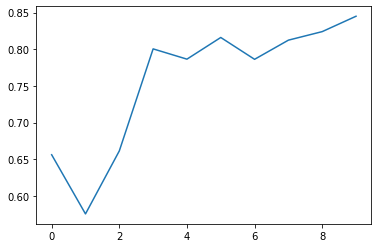

In [ ]:
print(rf1.score(feat_tr1, target_tr1))  
print(rf1.score(feat_te1, target_te1)) 

preds = np.stack([t.predict(feat_tr1) for t in rf1.estimators_])
preds[:,0], np.mean(preds[:,0])
plt.plot([metrics.r2_score(target_tr1, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

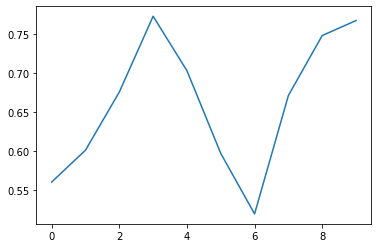

In [ ]:
preds = np.stack([t.predict(feat_te1) for t in rf1.estimators_])
preds[:,0], np.mean(preds[:,0])
plt.plot([metrics.r2_score(target_te1, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The  root-mean-square error (RMSE) metric is the measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. 